In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.offline as pyo
from autots import AutoTS

In [2]:
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date=(today-timedelta
            (days=732)).strftime("%Y-%m-%d")

data = yf.download('BIT-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date      Open      High       Low     Close  Adj Close  Volume
0 2022-06-12  0.000059  0.000059  0.000055  0.000055   0.000055       0
1 2022-06-13  0.000055  0.000055  0.000045  0.000046   0.000046       0
2 2022-06-14  0.000046  0.000048  0.000042  0.000046   0.000046       0
3 2022-06-15  0.000046  0.000047  0.000039  0.000047   0.000047       0
4 2022-06-16  0.000047  0.000048  0.000041  0.000041   0.000041       0


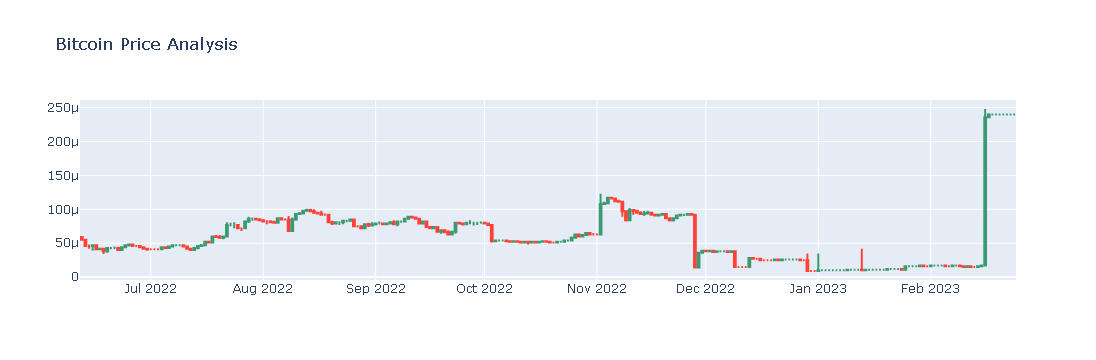

In [5]:
# Create the candlestick chart
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])

figure.update_layout(title="Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()


In [4]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.989776
Low          0.949008
Open         0.939233
Volume       0.137620
Date        -0.080216
Name: Close, dtype: float64
